- Amaia Rodríguez-Sierra Aguirrebeña _100472844_
- Lucía de Frutos Martín _100475960_
- Francisco Landa Ortega _100483174_

# Task  Task 2: Machine Learning model


### 1. Import and Install Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, silhouette_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Task 2.1: Regression and Classification Task

#### Load Dataset and Prepare Features

In [ ]:
file_path = '.'
df = pd.read_excel(f'{file_path}/BookingReviews_Task1.xlsx')
print("Initial Data Shape:", df.shape)
df.head()

Initial Data Shape: (61777, 13)


,Name,Review,Rating,AvgRating,Country,clean_review,tokens,review_len,lemmatized,joined_lemmas,glove_vector,embedding_coverage,lda_vector
0,The Hera Premium Hotels,Services are far away,5.0,5.7,Türkiye,services are far away,"['services', 'far', 'away']",4,"['service', 'far', 'away']",service far away,[-2.1656667e-01 1.4481267e-01 3.7502337e-01 ...,1.0,"[0.050000664, 0.05043597, 0.050537925, 0.05008..."
1,The Hera Premium Hotels,The air conditioner did not fit,7.0,5.7,Türkiye,the air conditioner did not fit,"['air', 'conditioner', 'not', 'fit']",6,"['air', 'conditioner', 'not', 'fit']",air conditioner not fit,[-5.45759976e-01 -2.01424956e-02 3.25487494e-...,1.0,"[0.5794834, 0.040197104, 0.2988736, 0.04129745..."
2,The Hera Premium Hotels,-The breakfast was limited and not hot\r\nAlso...,7.0,5.7,Türkiye,the breakfast was limited and not hot\r\nalso ...,"['breakfast', 'limited', 'not', 'hot', 'also',...",44,"['breakfast', 'limit', 'not', 'hot', 'also', '...",breakfast limit not hot also distance tourist ...,[-0.19023825 0.11697 0.20538403 0.144452...,1.0,"[0.08049821, 0.07227779, 0.19514716, 0, 0.6427..."
3,The Hera Premium Hotels,The employees deal with bad: 1/ I requested 5 ...,5.0,5.7,Türkiye,the employees deal with bad i requested wate...,"['employees', 'deal', 'bad', 'requested', 'wat...",43,"['employee', 'deal', 'bad', 'request', 'water'...",employee deal bad request water bottle tell pr...,[ 6.61047772e-02 2.11356774e-01 2.94627666e-...,1.0,"[0, 0.24515228, 0, 0.7283458, 0]"
4,The Hera Premium Hotels,Breakfast was not expected,7.0,5.7,Türkiye,breakfast was not expected,"['breakfast', 'not', 'expected']",4,"['breakfast', 'not', 'expect']",breakfast not expect,[-3.89293343e-01 2.27623343e-01 1.67126000e-...,1.0,"[0.051142175, 0.05066711, 0.05134363, 0.053181..."


In [ ]:
# Convert GloVe and LDA vector strings to numerical arrays
df['glove_vector'] = df['glove_vector'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ') if isinstance(x, str) else x)
df['lda_vector'] = df['lda_vector'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ') if isinstance(x, str) else x)

C:\Users\34684\AppData\Local\Temp\ipykernel_3988\652530648.py:3: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  df['lda_vector'] = df['lda_vector'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ') if isinstance(x, str) else x)


In [ ]:
# Combine Features for Model Input
glove_array = np.vstack(df['glove_vector'].values)
lda_array = np.vstack(df['lda_vector'].values)

X = np.hstack([glove_array, lda_array])  # 100-dim + 5-dim → 105 features
y = df['Rating'].values

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regression

#### Train and Evaluate Regressors

In [ ]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
# 2. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

In [ ]:
# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression Results:
RMSE: 2.2287
MAE: 1.6629
R² Score: 0.1673

Random Forest Results:
RMSE: 2.1323
MAE: 1.5905
R² Score: 0.2378


The performance of the regression models was assessed using three standard metrics: RMSE, MAE, and R² Score. The key findings are as follows:

- Root Mean Squared Error (RMSE) - This metric captures the average magnitude of prediction errors.
  - Observed RMSE values were approximately 2.1 to 2.2.
  - Given that ratings range from 1 to 10, this suggests that, on average, predictions deviate from the true rating by around 2 points, which is relatively high and indicates limited model precision.

- Mean Absolute Error (MAE) - MAE provides an average of the absolute differences between predicted and actual ratings.
  - The models yielded an MAE of approximately 1.5, indicating that predictions were off by 1.5 points on average, another sign of imprecision in the predicted ratings.

- R² Score (Coefficient of Determination) - This metric indicates how well the model explains the variability in the target variable.
  - A value of 1.0 represents a perfect prediction, 0.0 indicates performance no better than predicting the mean, and negative values imply worse-than-random predictions.
  - In our case, R² values ranged between 0.17 and 0.24, meaning that the models were able to explain only 17% to 24% of the variation in the user ratings. This suggests that a substantial portion of the variance remains unaccounted for by the features used.

#### Hyperparameter Tuning: Random Forest

In [ ]:
rf_param_dist = {
    'n_estimators': [50, 100],        # Smaller number of trees
    'max_depth': [None, 10],          # Keep it shallow to medium
    'min_samples_split': [2, 5],      # Limited split variation
    'min_samples_leaf': [1, 2],       # Fewer candidates
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_dist,
    n_iter=10,                # only 10 candidates
    cv=3,                     # fewer folds to reduce time
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predict and evaluate
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_best_rf, "Tuned RF (Randomized Search)")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}

Tuned RF (Randomized Search) Results:
RMSE: 2.1131
MAE: 1.5753
R² Score: 0.2514


Despite applying hyperparameter tuning to improve the Random Forest regression model, the results remained suboptimal, with only a slight performance gain and overall predictive accuracy still low. Given these limitations, we shifted our focus to a classification approach, hoping that discretizing the target variable would yield more robust and interpretable results.

### Classification

In [ ]:
# Create classification labels
def rating_to_label(rating):
    if rating < 4:
        return 'Very bad'
    elif 4 <= rating < 6:
        return 'Bad'
    elif 6 <= rating < 8:
        return 'Good'
    elif 8 <= rating <= 10:
        return 'Very Good'

df['rating_class'] = df['Rating'].apply(rating_to_label)
texts = df['joined_lemmas']
y = df['rating_class']

#### Training Linear Regressor and Random Forest

In [ ]:
def evaluate_model_rf(X, y, model_name):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

    # Define the Random Forest model
    clf = RandomForestClassifier(random_state=42)

    # Hyperparameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
    }

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Best model from grid search
    best_clf = grid_search.best_estimator_

    # Evaluate the best model on the test set
    y_pred = best_clf.predict(X_test)

    # Cross-validation score for the model
    cv_scores = cross_val_score(best_clf, X, y, cv=5)

    print(f"\n==== {model_name} ====")
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Cross-validation Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))
    print(classification_report(y_test, y_pred))

    # Confusion matrix and heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
def evaluate_model_lr(X, y, model_name):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

    # Define the logistic regression model
    clf = LogisticRegression(max_iter=1000)

    # Hyperparameter grid for Logistic Regression
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['lbfgs', 'liblinear'],  # Solver choice
        'penalty': ['l2', None],  # Regularization type
    }

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Best model from grid search
    best_clf = grid_search.best_estimator_

    # Evaluate the best model on the test set
    y_pred = best_clf.predict(X_test)

    # Cross-validation score for the model
    cv_scores = cross_val_score(best_clf, X, y, cv=5)

    print(f"\n==== {model_name} ====")
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Cross-validation Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### Prepare Data

In [ ]:
# Bow preparation
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(texts)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(texts)

#### Evaluate Models

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\Curro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Curro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Curro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac


==== Bag of Words ====
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Cross-validation Scores: [0.65118161 0.65393331 0.64929178 0.65940915 0.65609065]
Mean CV Score: 0.6539813012557842
              precision    recall  f1-score   support

         Bad       0.32      0.04      0.07      1119
        Good       0.38      0.13      0.19      3231
   Very Good       0.69      0.95      0.80      9700
    Very bad       0.51      0.31      0.39      1395

    accuracy                           0.66     15445
   macro avg       0.48      0.36      0.36     15445
weighted avg       0.58      0.66      0.58     15445



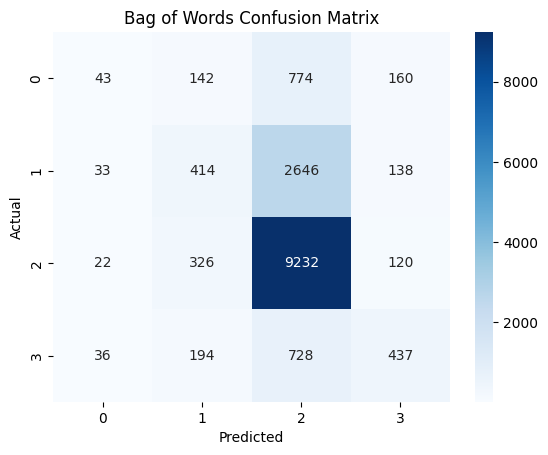

In [ ]:
evaluate_model_lr(X_bow, y, "Bag of Words")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

==== Bag of Words ====
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Cross-validation Scores: [0.64284558 0.65142441 0.64799676 0.64880615 0.64783488]
Mean CV Score: 0.647781557750056
              precision    recall  f1-score   support

         Bad       0.21      0.01      0.02      1119
        Good       0.34      0.12      0.17      3231
   Very Good       0.68      0.95      0.79      9700
    Very bad       0.55      0.30      0.39      1395

    accuracy                           0.65     15445
   macro avg       0.45      0.34      0.34     15445
weighted avg       0.56      0.65      0.57     15445



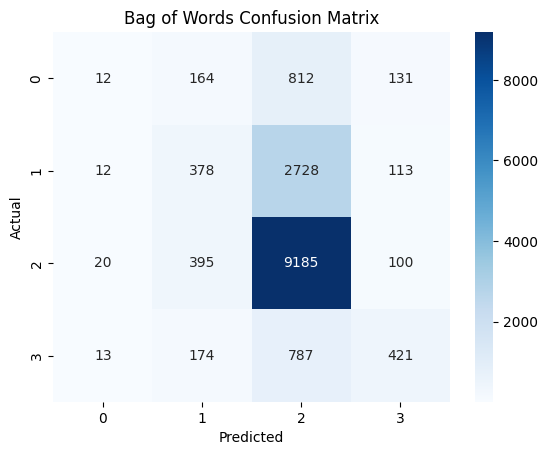

In [ ]:
evaluate_model_rf(X_bow, y, "Bag of Words")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\Curro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Curro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Curro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac


==== TF-IDF ====
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Cross-validation Scores: [0.65304306 0.65449984 0.64840146 0.65560502 0.65495751]
Mean CV Score: 0.6533013752667884
              precision    recall  f1-score   support

         Bad       0.28      0.01      0.02      1119
        Good       0.37      0.12      0.18      3231
   Very Good       0.69      0.95      0.80      9700
    Very bad       0.52      0.31      0.39      1395

    accuracy                           0.65     15445
   macro avg       0.46      0.35      0.35     15445
weighted avg       0.57      0.65      0.58     15445



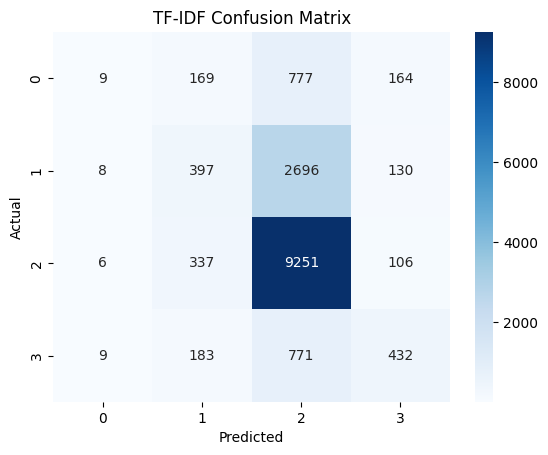

In [ ]:
evaluate_model_lr(X_tfidf, y, "TF-IDF")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

==== TF-IDF ====
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Cross-validation Scores: [0.64155066 0.64988669 0.64192635 0.64726831 0.64492108]
Mean CV Score: 0.6451106201965461
              precision    recall  f1-score   support

         Bad       0.17      0.01      0.02      1119
        Good       0.33      0.09      0.15      3231
   Very Good       0.67      0.95      0.79      9700
    Very bad       0.56      0.28      0.38      1395

    accuracy                           0.64     15445
   macro avg       0.43      0.34      0.33     15445
weighted avg       0.55      0.64      0.56     15445



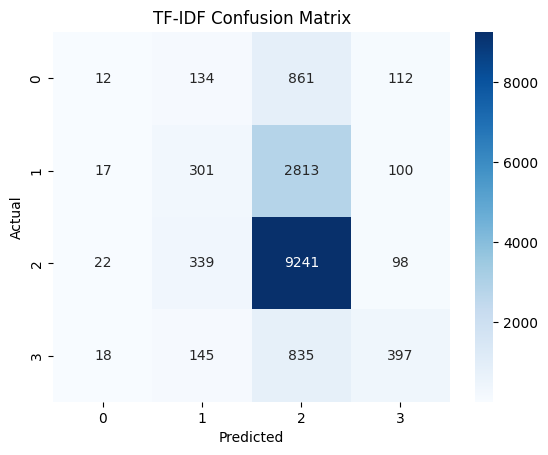

In [ ]:
evaluate_model_rf(X_tfidf, y, "TF-IDF")

The classification approach also failed to deliver satisfactory results, with low accuracy and limited ability to distinguish between classes effectively. Given the poor performance of both regression and classification models, we decided to explore clustering as an unsupervised alternative to uncover potential hidden patterns or groupings within the data.

## Task 2.2: Clustering Task

#### Load Dataset and Prepare Features

In [ ]:
# Load dataset again (to isolate from earlier transformations)
df = pd.read_excel(f'{file_path}/BookingReviews_Task1.xlsx')

In [ ]:
# Convert stored string vectors into numerical arrays
df['glove_vector'] = df['glove_vector'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ') if isinstance(x, str) else x)
df['lda_vector'] = df['lda_vector'].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else x)

# Create vector matrices
glove_matrix = np.stack(df['glove_vector'].values)
lda_matrix = np.stack(df['lda_vector'].values)

In [ ]:
# Compute TF-IDF from 'joined_lemmas'
corpus = df['joined_lemmas'].astype(str).fillna('')
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus).toarray()
print("TF-IDF shape:", tfidf_matrix.shape)

TF-IDF shape: (61777, 17409)


In [ ]:
# Apply dimensionality reduction to TF-IDF
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)
print("TF-IDF reduced shape:", tfidf_matrix_reduced.shape)

TF-IDF reduced shape: (61777, 100)


In [ ]:
# Feature selection by low variance
def apply_variance_threshold(X, threshold=0.01):
    selector = VarianceThreshold(threshold)
    return selector.fit_transform(X)

In [ ]:
# Evaluate clustering using KMeans and visualize the results
def evaluate_clustering(X, max_k=10, title="Vector", apply_fs=False):
    # Optionally apply feature selection
    if apply_fs:
        X = apply_variance_threshold(X)

    silhouette_scores = []
    sse = []

    # Iterate over different numbers of clusters
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42) # Initialize KMeans
        labels = kmeans.fit_predict(X) # Fit model and get cluster labels
        silhouette_scores.append(silhouette_score(X, labels)) # Evaluate using silhouette score
        sse.append(kmeans.inertia_) # Store SSE for Elbow method

    # Plotting the results
    plt.figure(figsize=(12, 5))

    # Elbow plot
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k + 1), sse, marker='o')
    plt.title(f'{title} - Elbow (SSE)')
    plt.xlabel('k')
    plt.ylabel('SSE')

    # Silhouette plot
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title(f'{title} - Silhouette')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

    # Determine the best number of clusters (k) based on the highest silhouette score
    best_k = np.argmax(silhouette_scores) + 2 # +2 since k starts from 2
    print(f"\nBest k for {title}: {best_k} (Silhouette = {max(silhouette_scores):.4f})")
    return best_k

In [ ]:
# Visualize clusters using PCA and KMeans
def visualize_clusters(X, k, title="Clusters", apply_fs=False):
    # Optionally apply feature selection
    if apply_fs:
        X = apply_variance_threshold(X)

    # Apply KMeans clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X) # Fit the model and get cluster labels

    # Reduce dimensionality to 2D using PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Plot the clusters
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10')
    plt.title(title)
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.show()

    # Print the number of samples in each cluster
    unique, counts = np.unique(labels, return_counts=True)
    print("Cluster sizes:")
    for u, c in zip(unique, counts):
        print(f"Cluster {u}: {c} samples")

    return labels

In [ ]:
cluster_results = {}


=== Evaluating GloVe ===


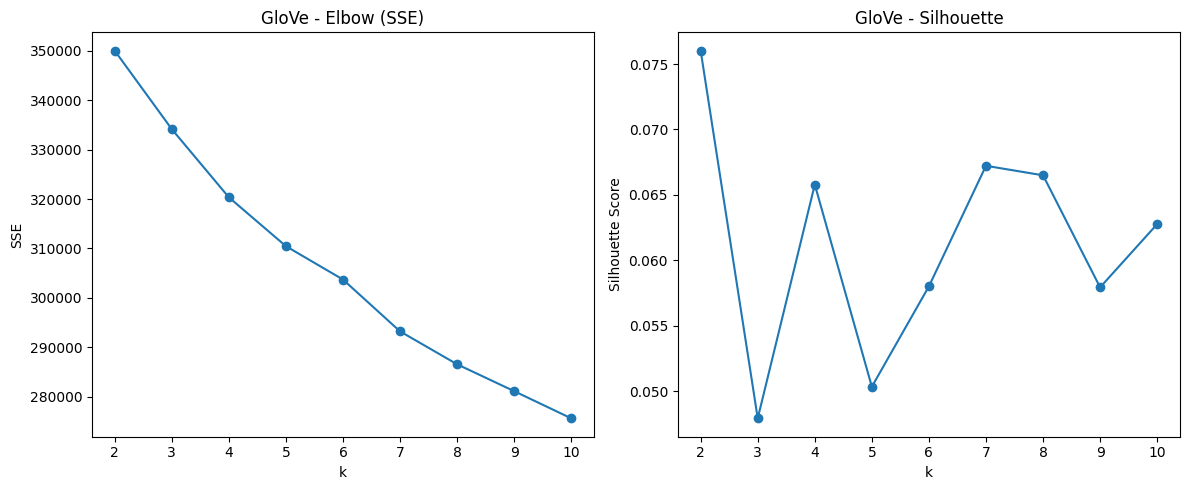


Best k for GloVe: 2 (Silhouette = 0.0760)


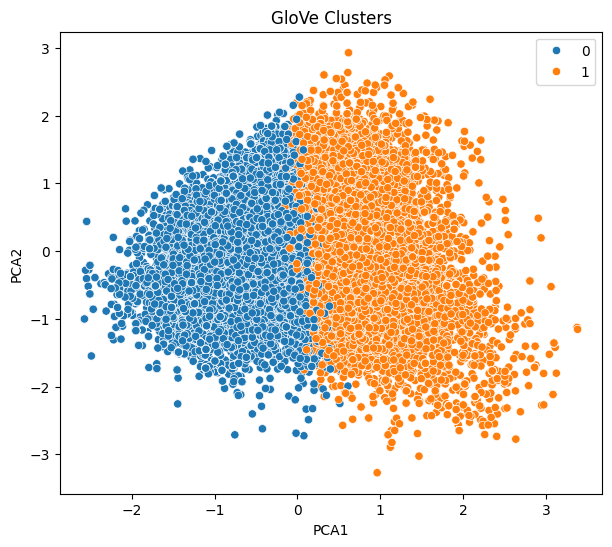

Cluster sizes:
Cluster 0: 35713 samples
Cluster 1: 26064 samples


In [ ]:
print("\n=== Evaluating GloVe ===")
best_k = evaluate_clustering(glove_matrix, title="GloVe", apply_fs=True)
glove_labels = visualize_clusters(glove_matrix, best_k, title="GloVe Clusters", apply_fs=True)
df['glove_cluster'] = glove_labels
cluster_results['GloVe'] = {"k": best_k, "labels": glove_labels}

In [ ]:
# Print top terms for each glove cluster
def print_top_terms_glove_clusters(df, labels, text_column='joined_lemmas', n_terms=10):
    df_temp = df[[text_column]].copy()
    df_temp['cluster'] = labels # Assign cluster labels to the documents

    # Vectorize the text data using TF-IDF
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df_temp[text_column].astype(str))

    # For each cluster, compute the mean TF-IDF score and extract top terms
    print("\n=== Top Terms per GloVe Cluster ===")
    for cluster_id in np.unique(labels):
        cluster_indices = np.where(labels == cluster_id)[0]
        cluster_tfidf = tfidf_matrix[cluster_indices]
        # Compute average TF-IDF scores for terms in the cluster
        mean_tfidf = np.asarray(cluster_tfidf.mean(axis=0)).flatten()
        # Get indices of top n_terms with highest average TF-IDF scores
        top_indices = mean_tfidf.argsort()[-n_terms:][::-1]
        # Retrieve the corresponding term names
        top_terms = [tfidf.get_feature_names_out()[i] for i in top_indices]
        # Print top terms for the cluster
        print(f"\nCluster {cluster_id}:")
        print(", ".join(top_terms))

In [ ]:
print_top_terms_glove_clusters(df, glove_labels)


=== Top Terms per GloVe Cluster ===

Cluster 0:
not, very, everything, room, price, good, hotel, beautiful, excellent, bad

Cluster 1:
room, hotel, site, small, old, breakfast, bathroom, air, furniture, cleanliness



=== Evaluating LDA ===


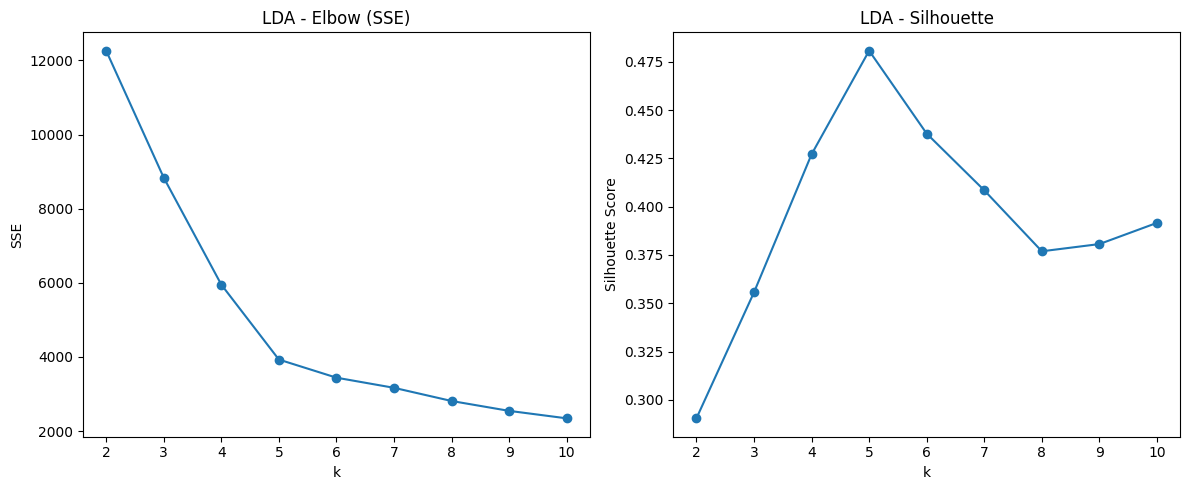


Best k for LDA: 5 (Silhouette = 0.4807)


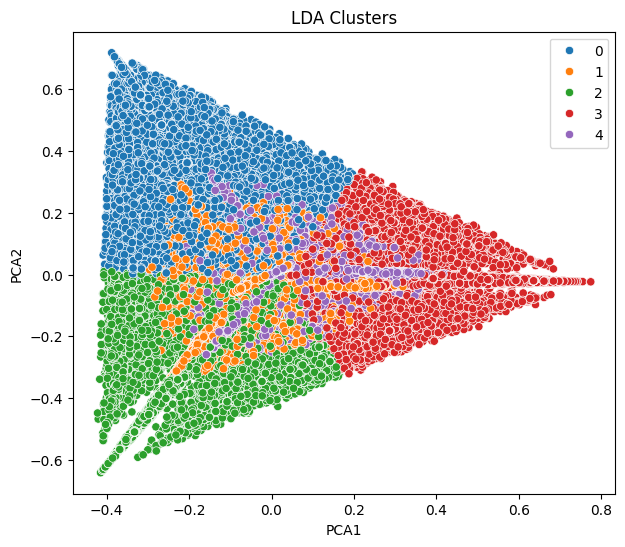

Cluster sizes:
Cluster 0: 15503 samples
Cluster 1: 10044 samples
Cluster 2: 13811 samples
Cluster 3: 15514 samples
Cluster 4: 6905 samples


In [ ]:
print("\n=== Evaluating LDA ===")
best_k = evaluate_clustering(lda_matrix, title="LDA", apply_fs=False)  # FS disabled
lda_labels = visualize_clusters(lda_matrix, best_k, title="LDA Clusters", apply_fs=False)
df['lda_cluster'] = lda_labels
cluster_results['LDA'] = {"k": best_k, "labels": lda_labels}

In [ ]:
# Print the top LDA topics for each cluster based on averaged topic distributions
def print_top_lda_topics(df, lda_matrix, lda_labels, n_top_topics=3):
    df_temp = pd.DataFrame(lda_matrix)
    df_temp['cluster'] = lda_labels

    print("\n=== Top Topics per LDA Cluster ===")
    # Iterate over each unique cluster
    for cluster_id in np.unique(lda_labels):
        # Select only the documents belonging to the current cluster
        cluster_docs = df_temp[df_temp['cluster'] == cluster_id].drop('cluster', axis=1)
        # Compute the average topic distribution for the cluster
        avg_topic_dist = cluster_docs.mean(axis=0)
        # Identify the top topics with the highest average weights
        top_topics = avg_topic_dist.sort_values(ascending=False).head(n_top_topics)
        # Print the top topic indices and their corresponding average weights
        print(f"\nCluster {cluster_id}: Top {n_top_topics} Topics:")
        for topic_id, weight in top_topics.items():
            print(f"  Topic {topic_id}: weight {weight:.3f}")

In [ ]:
print_top_lda_topics(df, lda_matrix, lda_labels)


=== Top Topics per LDA Cluster ===

Cluster 0: Top 3 Topics:
  Topic 3: weight 0.598
  Topic 2: weight 0.133
  Topic 4: weight 0.100

Cluster 1: Top 3 Topics:
  Topic 0: weight 0.567
  Topic 2: weight 0.144
  Topic 3: weight 0.116

Cluster 2: Top 3 Topics:
  Topic 2: weight 0.624
  Topic 3: weight 0.120
  Topic 4: weight 0.097

Cluster 3: Top 3 Topics:
  Topic 4: weight 0.661
  Topic 3: weight 0.087
  Topic 1: weight 0.086

Cluster 4: Top 3 Topics:
  Topic 1: weight 0.582
  Topic 4: weight 0.170
  Topic 3: weight 0.098


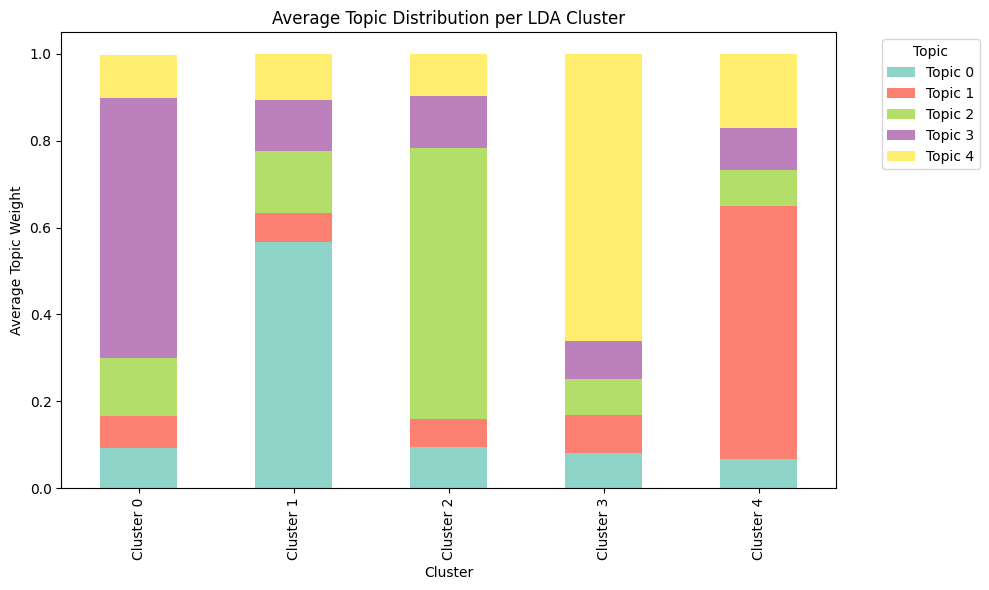

In [ ]:
# Visualize average LDA topic distributions per cluster
def plot_lda_topic_distribution(lda_matrix, lda_labels, n_topics=5):
    df_temp = pd.DataFrame(lda_matrix)
    df_temp['cluster'] = lda_labels

    # Compute average topic distribution for each cluster
    topic_weights = df_temp.groupby('cluster').mean()

    # Limit to the first n topics for simplicity in visualization
    topic_weights = topic_weights.iloc[:, :n_topics]
    # Rename cluster indices and topic columns for better readability
    topic_weights.index = [f"Cluster {i}" for i in topic_weights.index]
    topic_weights.columns = [f"Topic {i}" for i in range(n_topics)]

    # Plot stacked bar chart showing topic distributions per cluster
    topic_weights.plot(kind='bar', stacked=True, colormap='Set3', figsize=(10, 6))
    plt.title("Average Topic Distribution per LDA Cluster")
    plt.ylabel("Average Topic Weight")
    plt.xlabel("Cluster")
    plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_lda_topic_distribution(lda_matrix, lda_labels, n_topics=5)


=== Evaluating GloVe+LDA ===


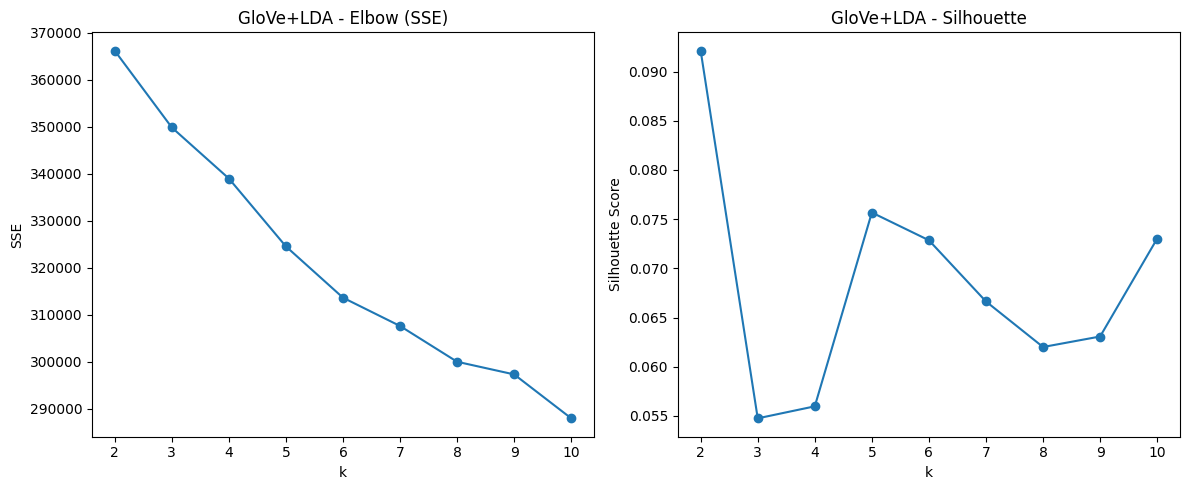


Best k for GloVe+LDA: 2 (Silhouette = 0.0921)


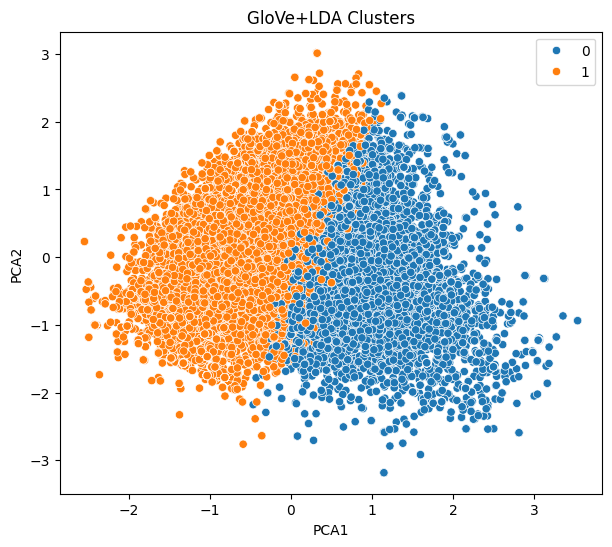

Cluster sizes:
Cluster 0: 20059 samples
Cluster 1: 41718 samples


In [ ]:
glove_lda_matrix = np.concatenate([glove_matrix, lda_matrix], axis=1)

print("\n=== Evaluating GloVe+LDA ===")
best_k = evaluate_clustering(glove_lda_matrix, title="GloVe+LDA", apply_fs=True)
glove_lda_labels = visualize_clusters(glove_lda_matrix, best_k, title="GloVe+LDA Clusters", apply_fs=True)
df['glove_lda_cluster'] = glove_lda_labels
cluster_results['GloVe+LDA'] = {"k": best_k, "labels": glove_lda_labels}


=== Evaluating TF-IDF (SVD reduced) ===


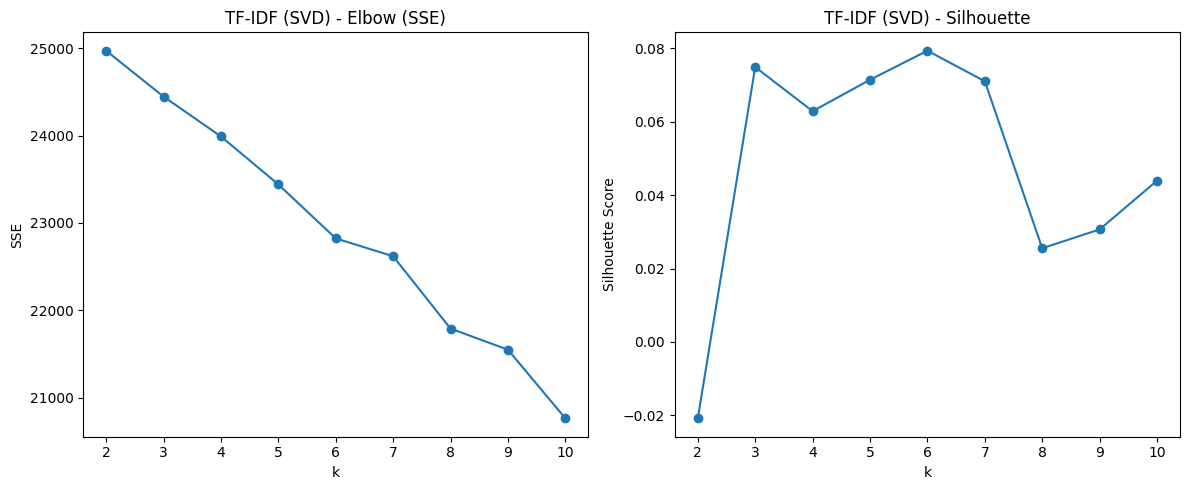


Best k for TF-IDF (SVD): 6 (Silhouette = 0.0794)


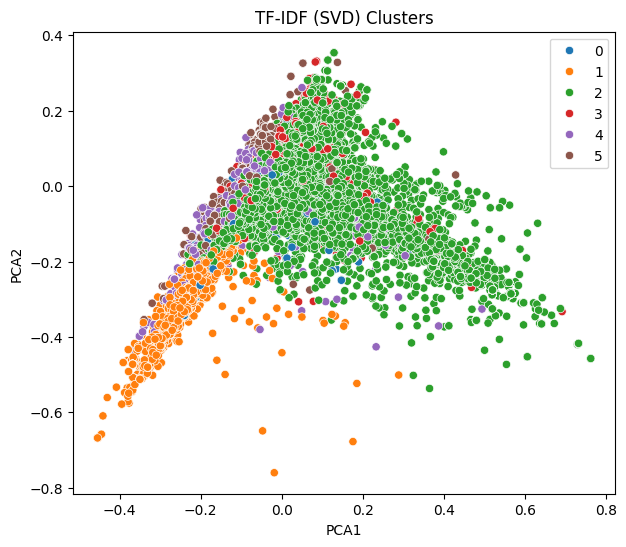

Cluster sizes:
Cluster 0: 1683 samples
Cluster 1: 2931 samples
Cluster 2: 48867 samples
Cluster 3: 3279 samples
Cluster 4: 2882 samples
Cluster 5: 2135 samples


In [ ]:
print("\n=== Evaluating TF-IDF (SVD reduced) ===")
best_k = evaluate_clustering(tfidf_matrix_reduced, title="TF-IDF (SVD)", apply_fs=False)  # Don't apply FS again
tfidf_labels = visualize_clusters(tfidf_matrix_reduced, best_k, title="TF-IDF (SVD) Clusters", apply_fs=False)
df['tf_idf_cluster'] = tfidf_labels
cluster_results['TF-IDF'] = {"k": best_k, "labels": tfidf_labels}

In [ ]:
# Print top TF-IDF terms for each cluster after clustering on TF-IDF vectors
def print_top_terms_tfidf_clusters(df, tfidf_matrix, labels, text_column='joined_lemmas', n_terms=10):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix_full = tfidf_vectorizer.fit_transform(df[text_column].astype(str))

    print("\n=== Top Terms per TF-IDF Cluster ===")
    # Iterate through each cluster
    for cluster_id in np.unique(labels):
        # Find the indices of documents in the current cluster
        cluster_indices = np.where(labels == cluster_id)[0]
        # Extract the TF-IDF submatrix corresponding to the cluster
        cluster_tfidf = tfidf_matrix_full[cluster_indices]
        # Compute the mean TF-IDF score for each term in the cluster
        mean_tfidf = np.asarray(cluster_tfidf.mean(axis=0)).flatten()
        # Identify indices of the top n_terms with the highest average TF-IDF
        top_indices = mean_tfidf.argsort()[-n_terms:][::-1]
        # Retrieve the corresponding term names from the TF-IDF vectorizer
        top_terms = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_indices]
        # Print the top terms for the current cluster
        print(f"\nCluster {cluster_id}:")
        print(", ".join(top_terms))

In [ ]:
print_top_terms_tfidf_clusters(df, tfidf_matrix, tfidf_labels)


=== Top Terms per TF-IDF Cluster ===

Cluster 0:
bed, uncomfortable, not, room, comfortable, pillow, small, very, two, clean

Cluster 1:
small, room, very, size, narrow, bathroom, somewhat, not, area, elevator

Cluster 2:
not, room, hotel, everything, very, site, beautiful, employee, clean, good

Cluster 3:
breakfast, not, very, good, diversity, varied, option, limited, limit, diverse

Cluster 4:
old, furniture, very, hotel, need, room, renew, somewhat, not, clean

Cluster 5:
price, high, expensive, very, exaggerate, room, exaggerated, somewhat, little, hotel


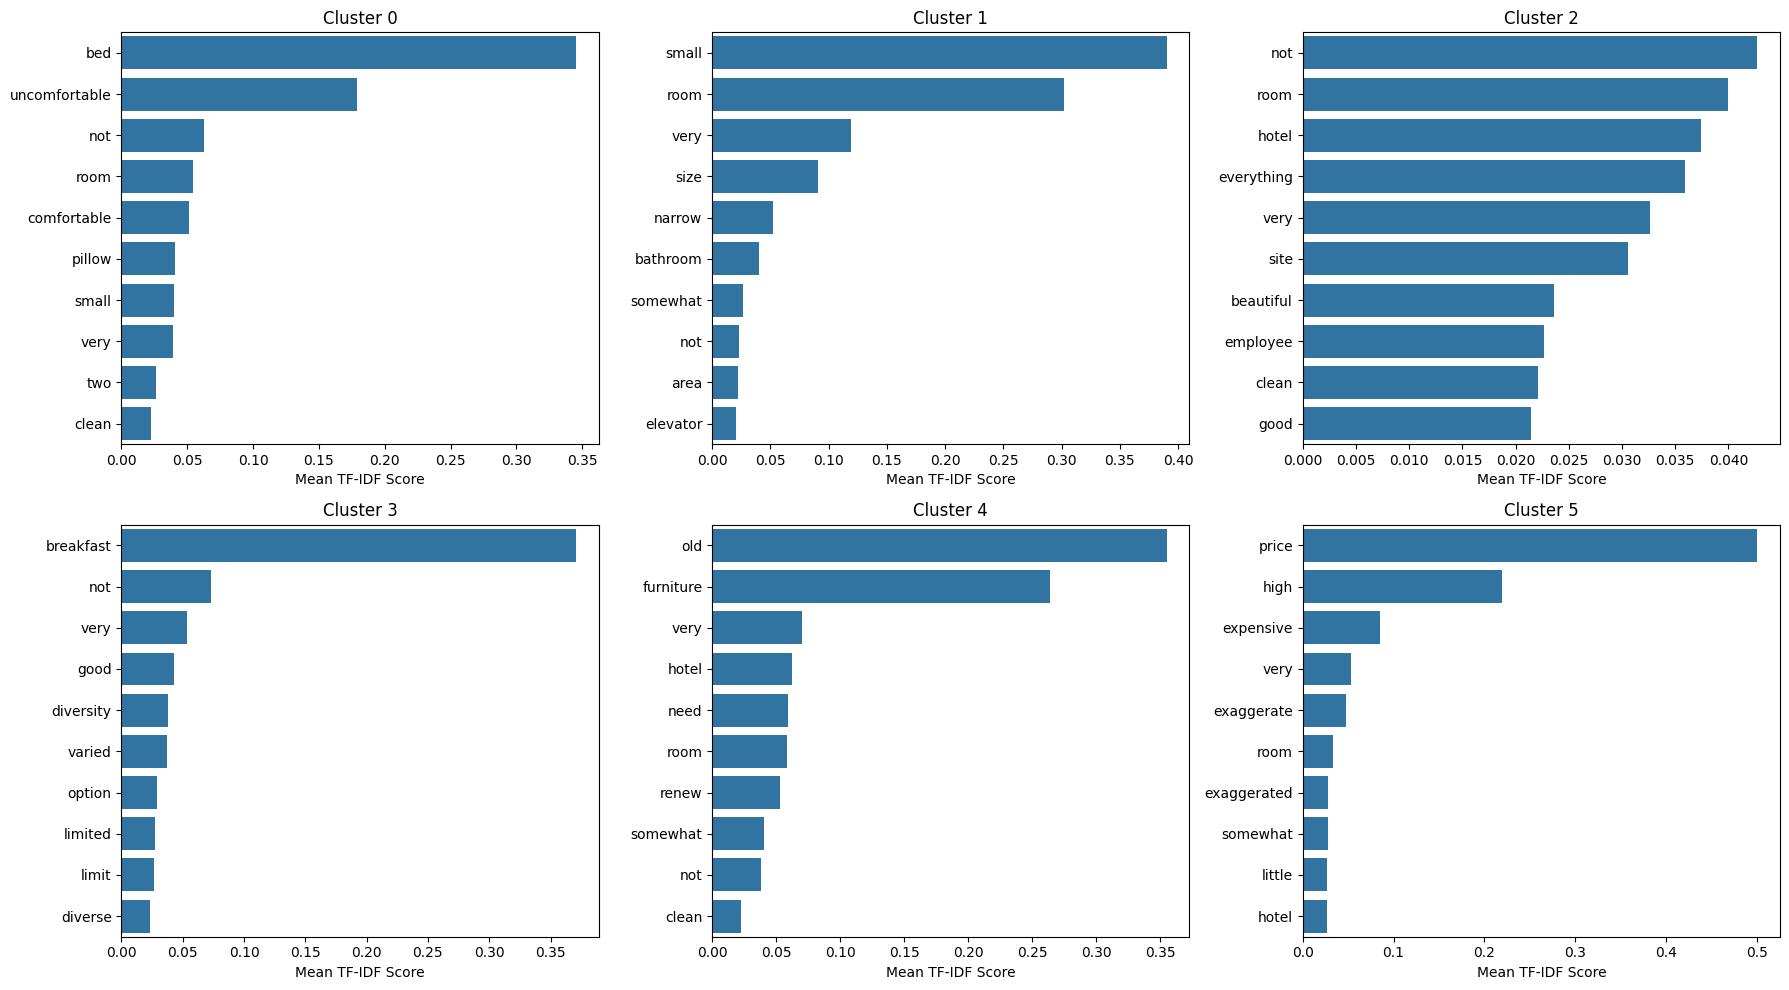

In [ ]:
# Plot bar charts of top TF-IDF terms for each cluster
def plot_top_terms_bar_charts(tfidf_matrix, labels, df, text_column='joined_lemmas', n_terms=10):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix_full = tfidf_vectorizer.fit_transform(df[text_column].astype(str))
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Prepare layout for subplots
    unique_clusters = sorted(np.unique(labels))
    n_rows = 2
    n_cols = 3

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
    axes = axes.flatten()

    # Loop over each cluster to plot top terms
    for i, cluster_id in enumerate(unique_clusters):
        cluster_indices = np.where(labels == cluster_id)[0]
        cluster_tfidf = tfidf_matrix_full[cluster_indices]
        mean_tfidf = np.asarray(cluster_tfidf.mean(axis=0)).flatten()
        top_indices = mean_tfidf.argsort()[-n_terms:][::-1]
        top_scores = mean_tfidf[top_indices]
        top_terms = feature_names[top_indices]

        sns.barplot(x=top_scores, y=top_terms, ax=axes[i])
        axes[i].set_title(f"Cluster {cluster_id}")
        axes[i].set_xlabel("Mean TF-IDF Score")
        axes[i].set_ylabel("")

    # Remove any unused subplot axes
    for j in range(i+1, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_top_terms_bar_charts(tfidf_matrix, tfidf_labels, df)